## Library

In [341]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  
pd.set_option("display.max_rows", 100)      
sns.set(style="whitegrid")                  

## Import Data

In [344]:
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx", sheet_name="Sheet1")

## Data Summary

In [346]:
print("Veri seti boyutu:", df.shape)

Veri seti boyutu: (2235, 13)


In [347]:
print("Sütunlar:", df.columns.tolist())

Sütunlar: ['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


In [351]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [352]:
df.tail()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika
2234,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,5 Dakika


In [353]:
print("\nVeri Tipleri:")
print(df.dtypes)


Veri Tipleri:
HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [359]:
missing_report = pd.DataFrame({
    "Eksik Sayısı": df.isnull().sum(),
    "Toplam": len(df),
    "Oran (%)": (df.isnull().mean()*100).round(2)
})
missing_report = missing_report[missing_report["Eksik Sayısı"] > 0]
print("Eksik değer raporu:")
display(missing_report)

Eksik değer raporu:


,Eksik Sayısı,Toplam,Oran (%)
Cinsiyet,169,2235,7.56
KanGrubu,675,2235,30.20
KronikHastalik,611,2235,27.34
Bolum,11,2235,0.49
Alerji,944,2235,42.24
Tanilar,75,2235,3.36
UygulamaYerleri,221,2235,9.89


<Axes: >

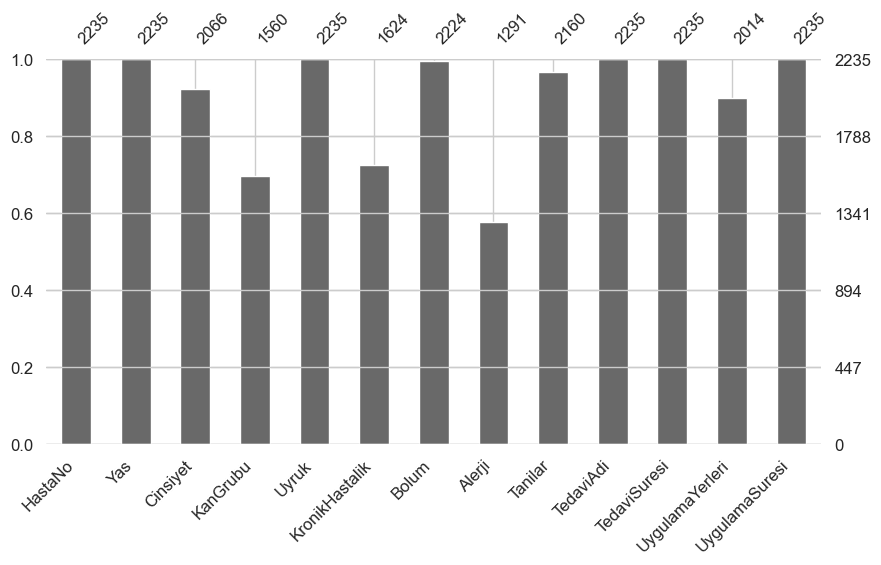

In [360]:
msno.bar(df, figsize=(10,5), fontsize=12)

In [361]:
df_numeric = df.drop(columns=["HastaNo"]).copy()

df_numeric["TedaviSuresi_num"] = df_numeric["TedaviSuresi"].str.extract(r"(\d+)").astype(float)
df_numeric["UygulamaSuresi_num"] = df_numeric["UygulamaSuresi"].str.extract(r"(\d+)").astype(float)

df_numeric[["Yas", "TedaviSuresi_num", "UygulamaSuresi_num"]].describe()

,Yas,TedaviSuresi_num,UygulamaSuresi_num
count,2235.000000,2235.000000,2235.000000
mean,47.327069,14.570917,16.573154
std,15.208634,3.725322,6.268635
min,2.000000,1.000000,3.000000
25%,38.000000,15.000000,10.000000
50%,46.000000,15.000000,20.000000
75%,56.000000,15.000000,20.000000
max,92.000000,37.000000,45.000000


In [363]:
df.describe(include="object")

,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
count,2066,1560,2235,1624,2224,1291,2160,2235,2235,2014,2235
unique,2,8,5,220,10,38,367,244,23,37,10
top,Kadın,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",Dorsalji -Boyun+trapez,15 Seans,Bel,20 Dakika
freq,1274,579,2173,38,2045,198,149,231,1670,528,1535


In [364]:
df.nunique()

HastaNo            404
Yas                 75
Cinsiyet             2
KanGrubu             8
Uyruk                5
KronikHastalik     220
Bolum               10
Alerji              38
Tanilar            367
TedaviAdi          244
TedaviSuresi        23
UygulamaYerleri     37
UygulamaSuresi      10
dtype: int64

In [367]:
tablo = pd.Series({
    "Cinsiyet": df["Cinsiyet"].unique(),
    "Kan Grubu": df["KanGrubu"].unique(),
    "Uyruk": df["Uyruk"].unique()
})

print(tablo)

Cinsiyet                                   [Kadın, Erkek, nan]
Kan Grubu    [0 Rh+, A Rh+, B Rh+, B Rh-, AB Rh+, nan, A Rh...
Uyruk        [Türkiye, Tokelau, Azerbaycan, Libya, Arnavutluk]
dtype: object


In [370]:
df_numeric["KronikHastalik_sayisi"] = (
    df["KronikHastalik"]
    .fillna("")                                
    .astype(str)                               
    .apply(lambda x: len([d for d in x.split(",") if d.strip() != ""]))
)

print(df_numeric[["KronikHastalik", "KronikHastalik_sayisi"]].head(10))


                                      KronikHastalik  KronikHastalik_sayisi
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...                      3
1  Duchenne Musküler Distrofisi, Myastenia gravis...                      4
2  Duchenne Musküler Distrofisi, Myastenia gravis...                      4
3  Duchenne Musküler Distrofisi, Myastenia gravis...                      4
4  Duchenne Musküler Distrofisi, Myastenia gravis...                      4
5  Duchenne Musküler Distrofisi, Myastenia gravis...                      4
6                                                NaN                      0
7                                                NaN                      0
8                                                NaN                      0
9  Hiportiroidizm, Diyabet, Duchenne Musküler Dis...                      4


In [372]:
print("Tekrar eden satır sayısı:", df.duplicated().sum())

Tekrar eden satır sayısı: 928


In [373]:
df[df.duplicated(keep=False)].head(5)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika


## Patient Count Distribution

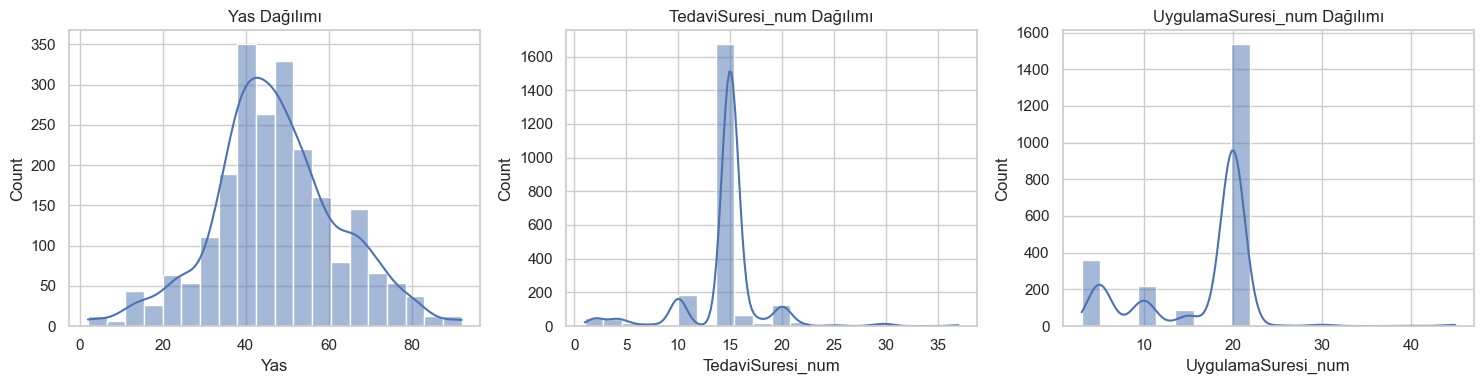

In [378]:
sayisal = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num"]

plt.figure(figsize=(15,4))

for i, col in enumerate(sayisal, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_numeric[col], bins=20, kde=True)
    plt.title(f"{col} Dağılımı")

plt.tight_layout()
plt.show()

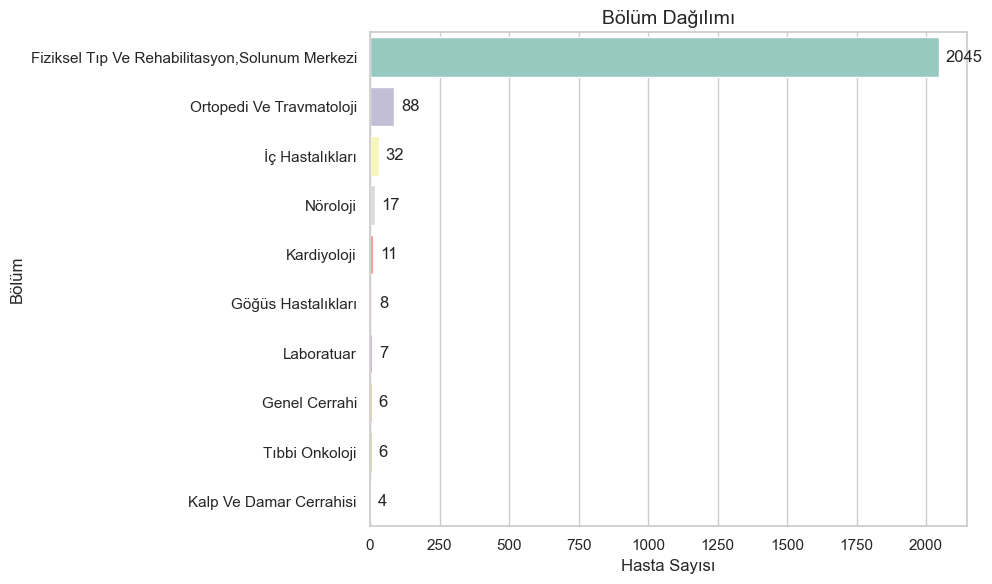

In [379]:
order = df["Bolum"].value_counts().index

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df,
    y="Bolum",
    order=order,
    hue="Bolum",           
    palette="Set3",
    dodge=False,
    legend=False
)

plt.title("Bölüm Dağılımı", fontsize=14)
plt.xlabel("Hasta Sayısı")
plt.ylabel("Bölüm")

for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}",
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha="left", va="center", xytext=(5,0), textcoords="offset points")

plt.tight_layout()
plt.show()

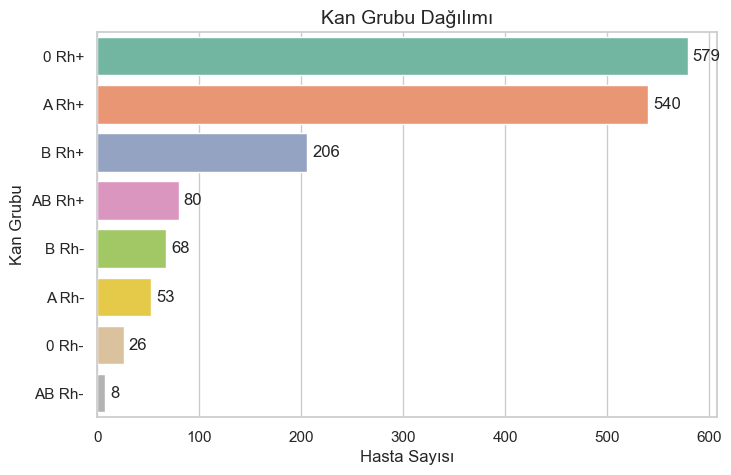

In [380]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=df["KanGrubu"].value_counts().values,
    y=df["KanGrubu"].value_counts().index,
    hue=df["KanGrubu"].value_counts().index,  
    palette="Set2",
    dodge=False,
    legend=False
)

plt.title("Kan Grubu Dağılımı", fontsize=14)
plt.xlabel("Hasta Sayısı")
plt.ylabel("Kan Grubu")

for i, v in enumerate(df["KanGrubu"].value_counts().values):
    ax.text(v+5, i, str(v), va="center")

plt.show()

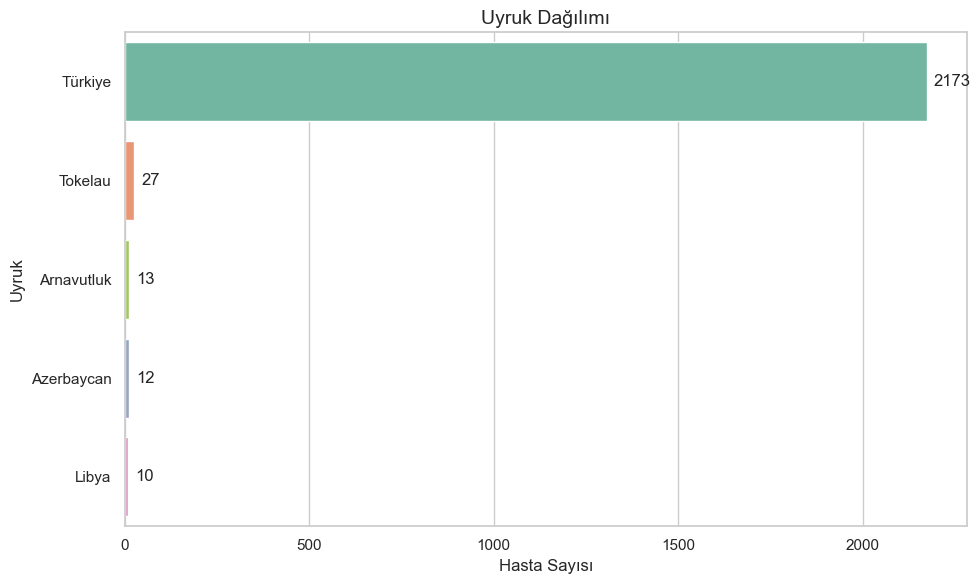

In [381]:
order = df["Uyruk"].value_counts().index

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df,
    y="Uyruk",
    order=order,
    hue="Uyruk",          
    palette="Set2",
    dodge=False,
    legend=False
)

plt.title("Uyruk Dağılımı", fontsize=14)
plt.xlabel("Hasta Sayısı")
plt.ylabel("Uyruk")

for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}",
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha="left", va="center", xytext=(5,0), textcoords="offset points")

plt.tight_layout()
plt.show()

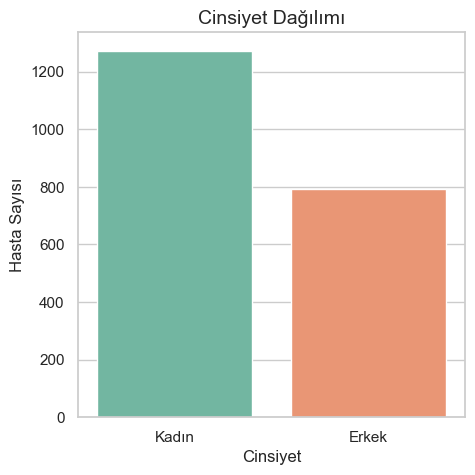

In [382]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Cinsiyet", hue="Cinsiyet", palette="Set2", legend=False)
plt.title("Cinsiyet Dağılımı", fontsize=14)
plt.xlabel("Cinsiyet")
plt.ylabel("Hasta Sayısı")
plt.show()

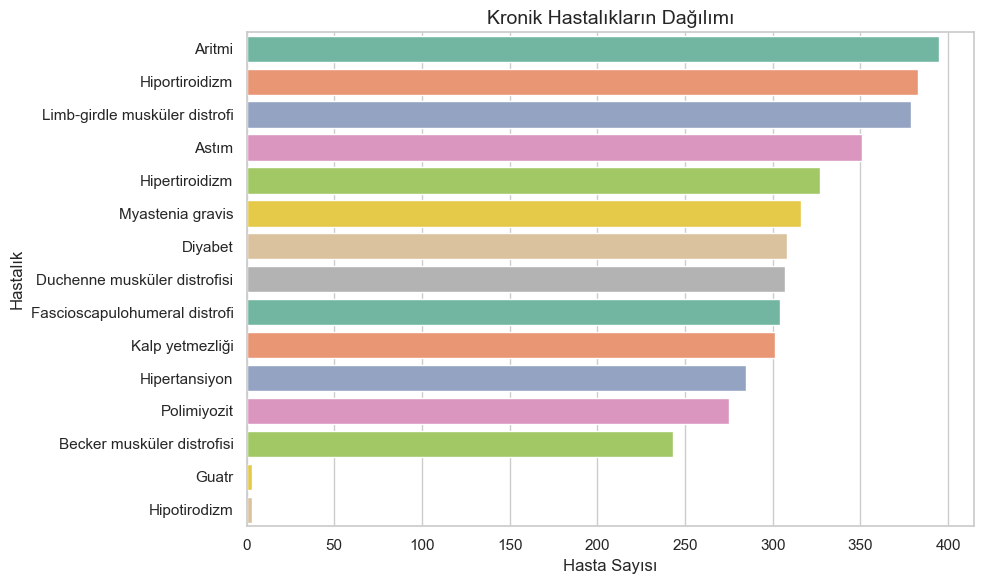

In [383]:
all_diseases = (
    df["KronikHastalik"]
    .dropna()
    .astype(str)
    .str.lower()
    .str.split(",")
)

flat = [d.strip().capitalize() for sublist in all_diseases for d in sublist if d.strip() != ""]
counts = Counter(flat)

hastalik_df = (
    pd.DataFrame(counts.items(), columns=["Hastalik", "Sayi"])
    .sort_values("Sayi", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=hastalik_df,
    x="Sayi",
    y="Hastalik",
    hue="Hastalik",      
    palette="Set2",
    dodge=False,
    legend=False
)

plt.title("Kronik Hastalıkların Dağılımı", fontsize=14)
plt.xlabel("Hasta Sayısı")
plt.ylabel("Hastalık")

plt.tight_layout()
plt.show()

## Treatment Duration Analysis

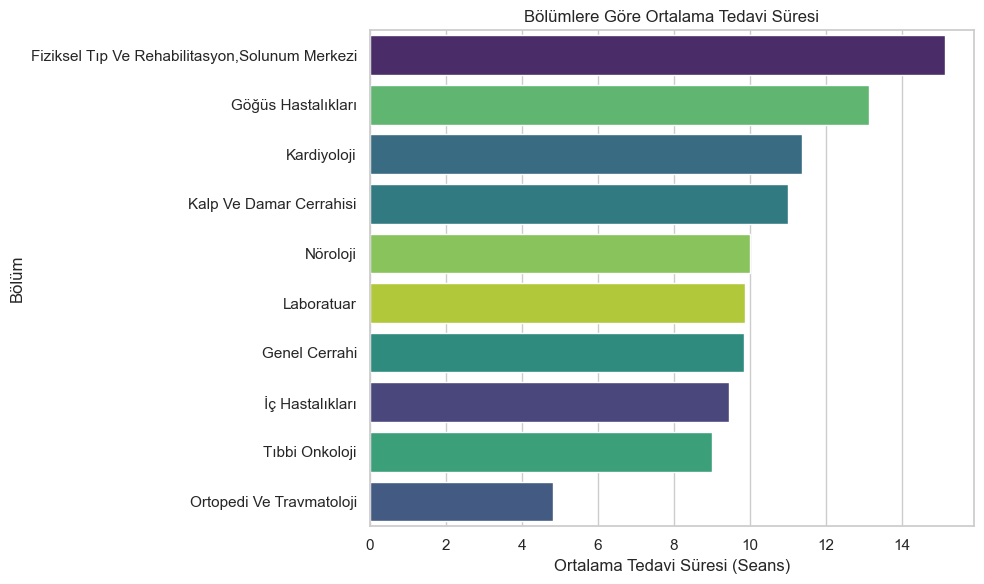

In [386]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_numeric, 
    y="Bolum", 
    x="TedaviSuresi_num",
    errorbar=None,   # ci=None yerine
    order=df_numeric.groupby("Bolum")["TedaviSuresi_num"]
                    .mean().sort_values(ascending=False).index,
    hue="Bolum",
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Bölümlere Göre Ortalama Tedavi Süresi")
plt.xlabel("Ortalama Tedavi Süresi (Seans)")
plt.ylabel("Bölüm")
plt.tight_layout()
plt.show()

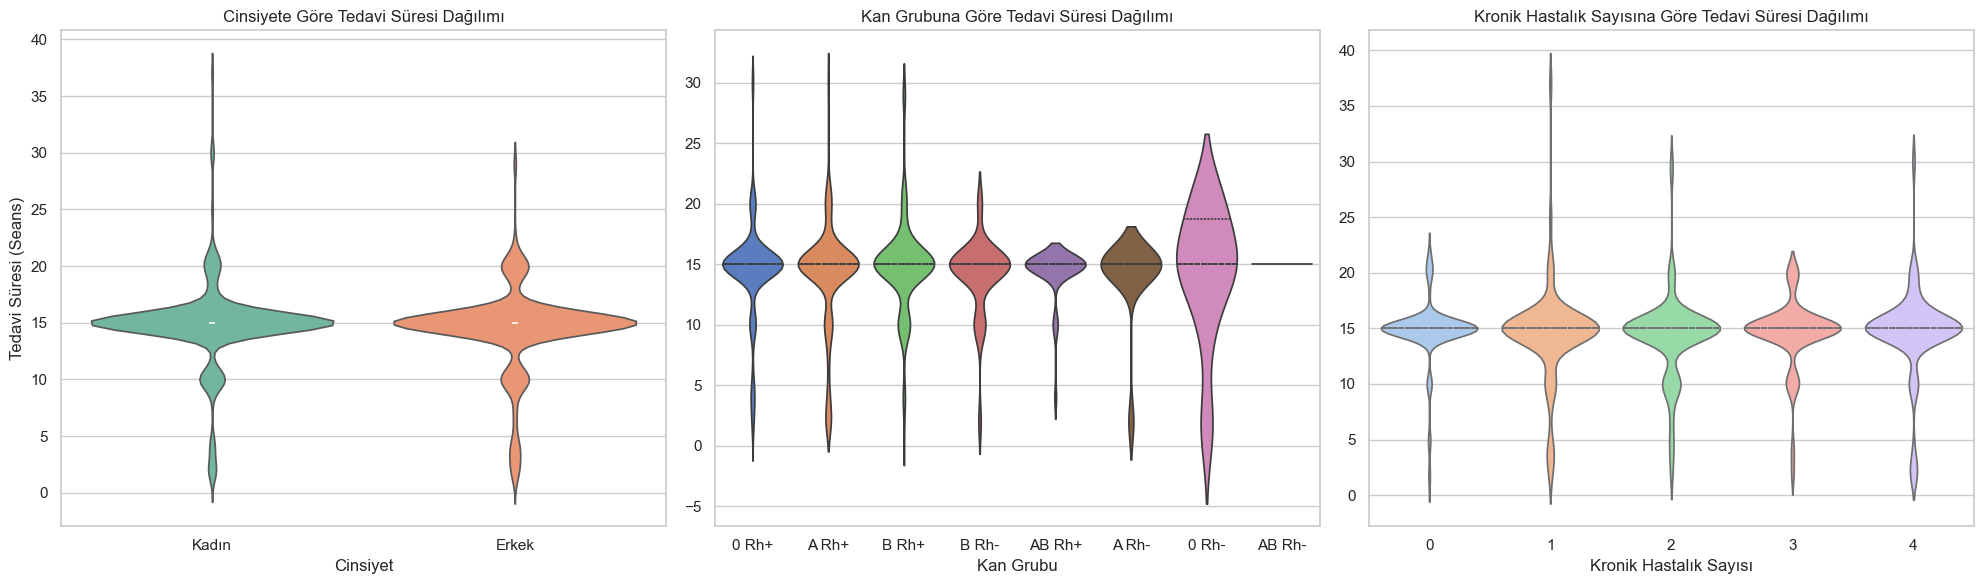

In [388]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))  # 1 satır, 3 sütun

sns.violinplot(
    data=df_numeric, x="Cinsiyet", y="TedaviSuresi_num",
    hue="Cinsiyet", palette="Set2", legend=False, ax=axes[0]
)
axes[0].set_title("Cinsiyete Göre Tedavi Süresi Dağılımı")
axes[0].set_xlabel("Cinsiyet")
axes[0].set_ylabel("Tedavi Süresi (Seans)")

sns.violinplot(
    data=df_numeric, x="KanGrubu", y="TedaviSuresi_num",
    hue="KanGrubu", palette="muted", inner="quartile",
    legend=False, ax=axes[1]
)
axes[1].set_title("Kan Grubuna Göre Tedavi Süresi Dağılımı")
axes[1].set_xlabel("Kan Grubu")
axes[1].set_ylabel("")

sns.violinplot(
    data=df_numeric, x="KronikHastalik_sayisi", y="TedaviSuresi_num",
    hue="KronikHastalik_sayisi", palette="pastel", inner="quartile",
    legend=False, ax=axes[2]
)
axes[2].set_title("Kronik Hastalık Sayısına Göre Tedavi Süresi Dağılımı")
axes[2].set_xlabel("Kronik Hastalık Sayısı")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


## Application time analysis

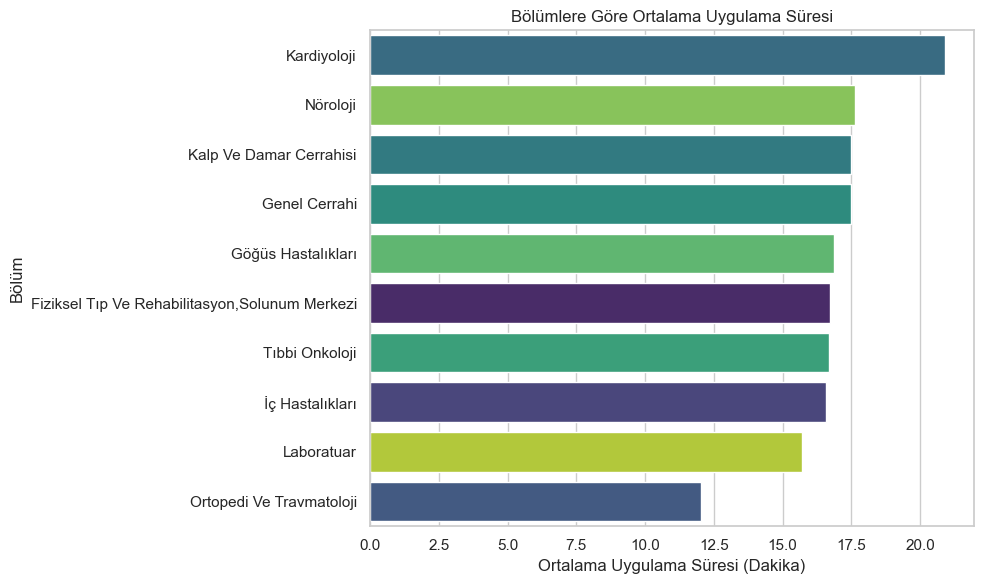

In [393]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_numeric,
    y="Bolum",
    x="UygulamaSuresi_num",
    errorbar=None,
    order=df_numeric.groupby("Bolum")["UygulamaSuresi_num"]
                    .mean().sort_values(ascending=False).head(10).index,
    hue="Bolum",           
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Bölümlere Göre Ortalama Uygulama Süresi")
plt.xlabel("Ortalama Uygulama Süresi (Dakika)")
plt.ylabel("Bölüm")
plt.tight_layout()
plt.show()


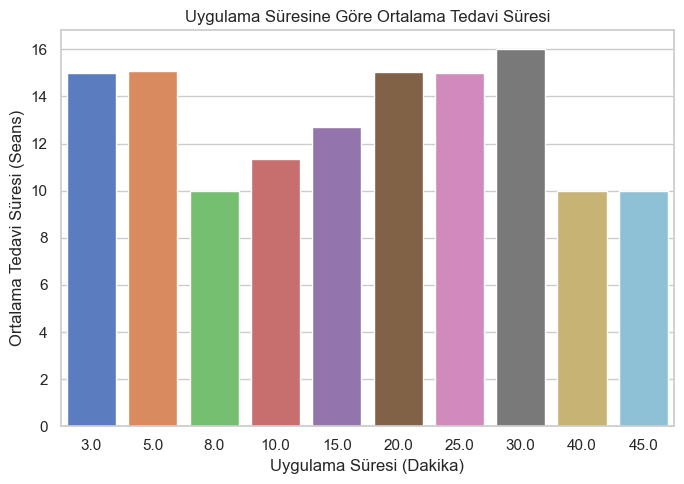

In [394]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=df_numeric, 
    x="UygulamaSuresi_num", 
    y="TedaviSuresi_num",
    errorbar=None,           
    hue="UygulamaSuresi_num",
    palette="muted",
    dodge=False,
    legend=False
)
plt.title("Uygulama Süresine Göre Ortalama Tedavi Süresi")
plt.xlabel("Uygulama Süresi (Dakika)")
plt.ylabel("Ortalama Tedavi Süresi (Seans)")
plt.tight_layout()
plt.show()


In [396]:
def liste_say(col):
    return col.fillna("").astype(str).apply(
        lambda x: len([p for p in x.split(",") if p.strip() != ""])
    )

df["KronikHastalik_sayisi"] = liste_say(df["KronikHastalik"])
df["Tanilar_sayisi"]        = liste_say(df["Tanilar"])
df["UygulamaYerleri_sayisi"]= liste_say(df["UygulamaYerleri"])

## correlation

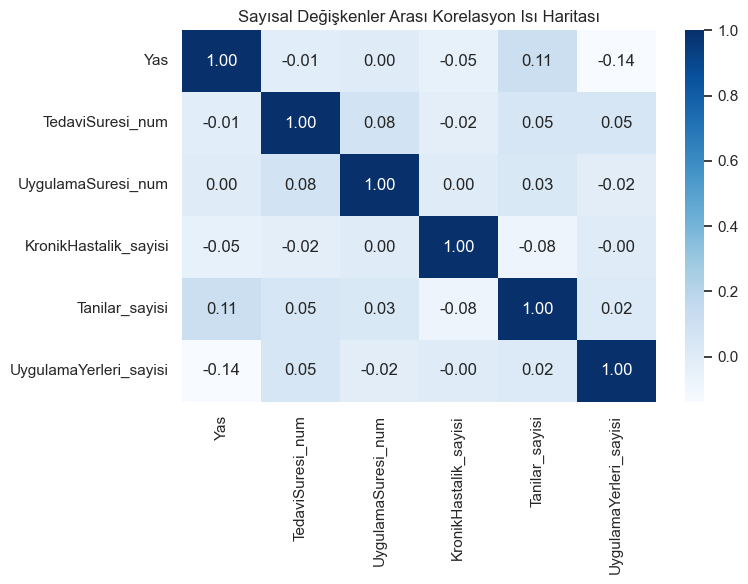

In [399]:
df["TedaviSuresi_num"]   = df["TedaviSuresi"].astype(str).str.extract(r"(\d+)").astype(float)
df["UygulamaSuresi_num"] = df["UygulamaSuresi"].astype(str).str.extract(r"(\d+)").astype(float)

sayisal = ["Yas","TedaviSuresi_num","UygulamaSuresi_num",
           "KronikHastalik_sayisi","Tanilar_sayisi","UygulamaYerleri_sayisi"]

numdf = df[sayisal].apply(pd.to_numeric, errors="coerce")
corr  = numdf.loc[:, numdf.nunique()>1].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Isı Haritası")
plt.tight_layout(); plt.show()


## Numerical Features: Distributions & Relationships

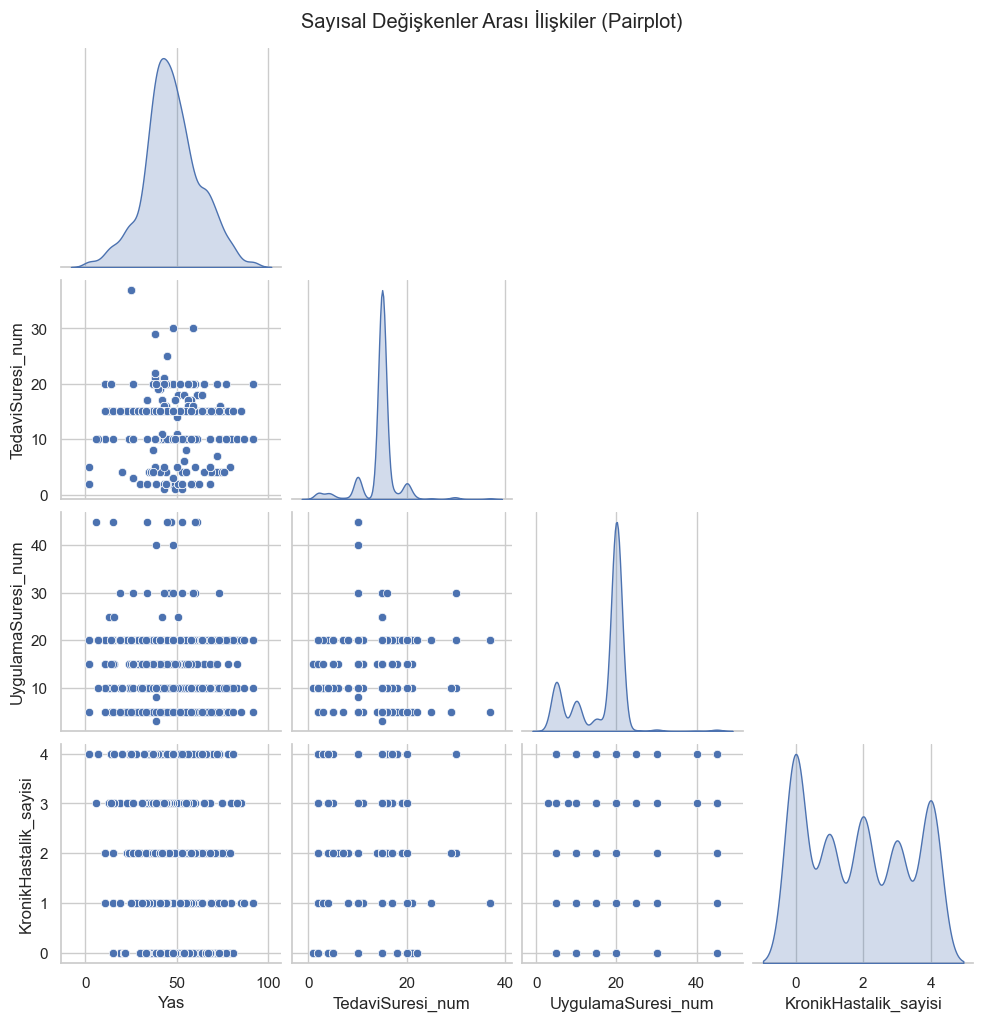

In [401]:
sayisal = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num",
           "KronikHastalik_sayisi", "Tanilar_sayisi", "UygulamaYerleri_sayisi"]

avail = [c for c in sayisal if c in df_numeric.columns]

sns.pairplot(df_numeric[avail], diag_kind="kde", corner=True)
plt.suptitle("Sayısal Değişkenler Arası İlişkiler (Pairplot)", y=1.02)
plt.show()


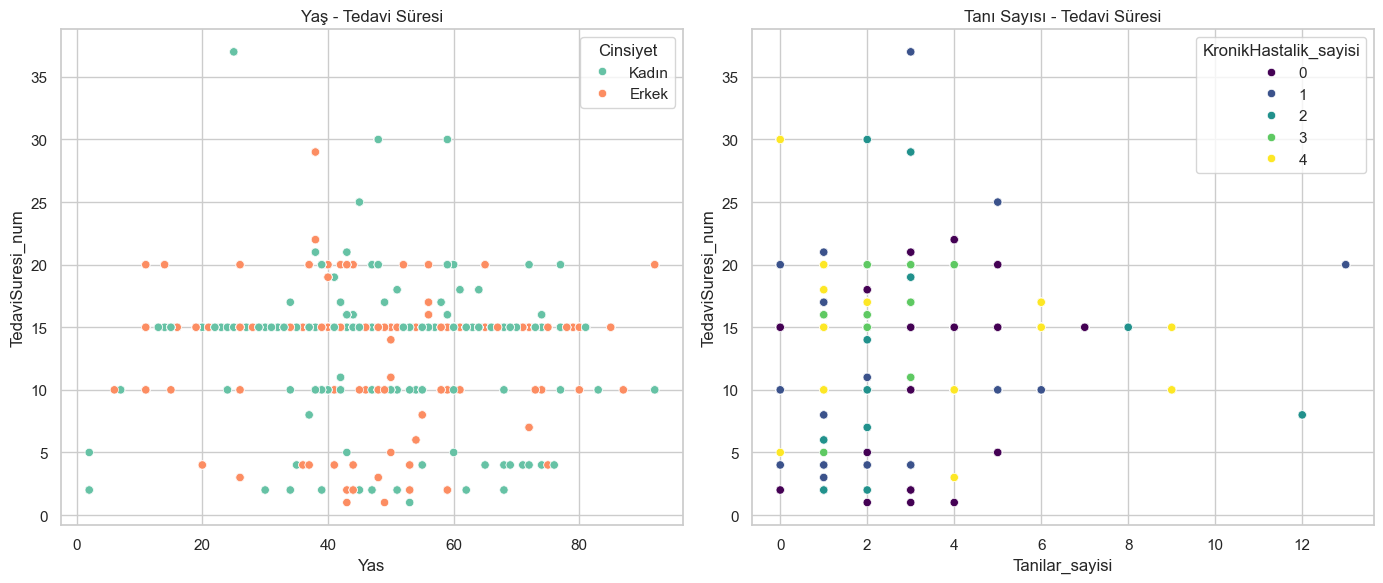

In [402]:
for c in ["Tanilar_sayisi", "KronikHastalik_sayisi", "UygulamaYerleri_sayisi"]:
    if c in df.columns and c not in df_numeric.columns:
        df_numeric[c] = df[c]
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(
    data=df_numeric, x="Yas", y="TedaviSuresi_num",
    hue="Cinsiyet", palette="Set2", ax=axes[0]
)
axes[0].set_title("Yaş - Tedavi Süresi")

sns.scatterplot(
    data=df_numeric, x="Tanilar_sayisi", y="TedaviSuresi_num",
    hue="KronikHastalik_sayisi", palette="viridis", ax=axes[1]
)
axes[1].set_title("Tanı Sayısı - Tedavi Süresi")

plt.tight_layout()
plt.show()


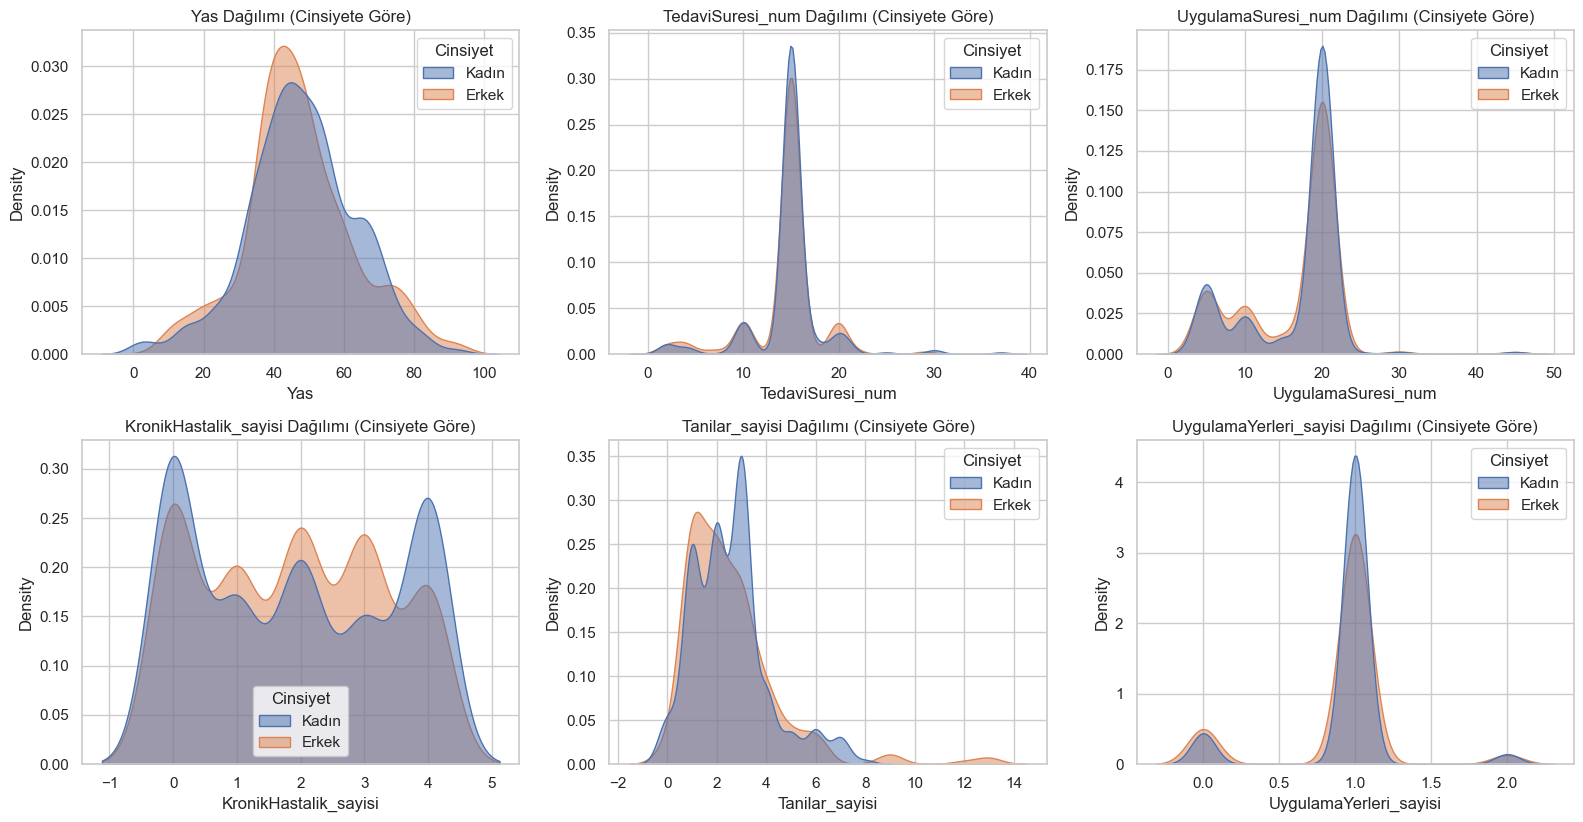

In [404]:
columns = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num",
           "KronikHastalik_sayisi", "Tanilar_sayisi", "UygulamaYerleri_sayisi"]

fig, ax = plt.subplots(3, 3, figsize=(16, 12))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.kdeplot(
        data=df_numeric, x=column, hue="Cinsiyet",
        fill=True, common_norm=False, alpha=0.5, ax=ax[i]
    )
    ax[i].set_title(f"{column} Dağılımı (Cinsiyete Göre)")


for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


## Top 10 Frequencies: Chronic Conditions, Diagnoses, and Application Sites

In [405]:
print("En sık görülen 10 kronik hastalık:")
print(df["KronikHastalik"].dropna().value_counts().head(10))
print("\n")

print("En sık görülen 10 tanı:")
print(df["Tanilar"].dropna().value_counts().head(10))
print("\n")

print("En sık görülen 10 uygulama yeri:")
print(df["UygulamaYerleri"].dropna().value_counts().head(10))

En sık görülen 10 kronik hastalık:
KronikHastalik
Myastenia gravis                        38
Aritmi                                  36
Fascioscapulohumeral Distrofi           36
Hipertiroidizm                          34
Limb-Girdle Musküler Distrofi, Astım    34
Kalp yetmezliği                         33
Hipertansiyon                           31
Astım                                   30
Becker Musküler Distrofisi              29
Limb-Girdle Musküler Distrofi           28
Name: count, dtype: int64


En sık görülen 10 tanı:
Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                 149
Omuzun darbe sendromu                              128
İntervertebral disk bozuklukları, tanımlanmamış    116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE               96
Eklem ağrısı                                        51
DORSALJİ, DİĞER, SERVİKAL BÖLGE                     49
Radikülopati                                        37
Dorsalji, tanımlanmamış                             32
Menisküs yırtığı, şi

## Data preprocessing

In [407]:
missing_report = pd.DataFrame({
    "Eksik Sayısı": df.isnull().sum(),
    "Toplam": len(df),
    "Oran (%)": (df.isnull().mean()*100).round(2)
})
missing_report = missing_report[missing_report["Eksik Sayısı"] > 0]
print("Eksik değer raporu:")
display(missing_report)

Eksik değer raporu:


,Eksik Sayısı,Toplam,Oran (%)
Cinsiyet,169,2235,7.56
KanGrubu,675,2235,30.20
KronikHastalik,611,2235,27.34
Bolum,11,2235,0.49
Alerji,944,2235,42.24
Tanilar,75,2235,3.36
UygulamaYerleri,221,2235,9.89


In [409]:
from sklearn.impute import KNNImputer

df["Cinsiyet_encoded"] = df["Cinsiyet"].map({"Kadın": 0, "Erkek": 1})

features_for_knn = ["Yas", "Cinsiyet_encoded"]

imputer = KNNImputer(n_neighbors=5)
df[features_for_knn] = imputer.fit_transform(df[features_for_knn])

df["Cinsiyet"] = df["Cinsiyet_encoded"].round().map({0: "Kadın", 1: "Erkek"})

print("Eksik Cinsiyet sayısı:", df["Cinsiyet"].isna().sum())

print(df["Cinsiyet"].head())

Eksik Cinsiyet sayısı: 0
0    Kadın
1    Erkek
2    Erkek
3    Erkek
4    Erkek
Name: Cinsiyet, dtype: object


In [411]:
df["Cinsiyet"].unique()

array(['Kadın', 'Erkek'], dtype=object)

In [413]:
df["Alerji"].unique()

array(['TOZ', nan, 'POLEN,NOVALGIN', 'NOVALGIN', 'Polen', 'Toz',
       'Polen,Yer Fıstığı', 'POLEN', 'TOZ,Novalgin', 'Sucuk', 'Volteren',
       'ARVELES,CORASPIN', 'VOLTAREN,Toz', 'Polen,Toz', 'GRİPİN',
       'Novalgin', 'VOLTAREN', 'Toz,TOZ', 'NOVALGIN,Novalgin', 'SUCUK',
       'TOZ,POLEN', 'TOZ,GRİPİN', 'SUCUK,GRIPIN', 'Novalgin,Sucuk',
       'VOLTAREN,Polen', 'Voltaren', 'GRIPIN', 'Polen,NOVALGIN',
       'Polen,TOZ', 'VOLTAREN,POLEN', 'POLEN,TOZ', 'NOVALGIN,Polen',
       'POLEN,Voltaren', 'Polen,GRIPIN', 'Volteren,GRİPİN',
       'TOZ,VOLTAREN', 'Novalgin,Polen', 'Voltaren,POLEN',
       'Polen,Voltaren'], dtype=object)

In [414]:
df["Alerji"] = df["Alerji"].str.lower().str.strip()


df["Alerji"] = df["Alerji"].replace({
    "volteren": "voltaren",  
    "novalgine": "novalgin", 
})

df["Alerji"] = df["Alerji"].apply(
    lambda x: ",".join(sorted(set(str(x).replace(" ", "").split(",")))) if pd.notna(x) else "Yok"
)

print("Eksik değer sayısı:", df["Alerji"].isna().sum())

Eksik değer sayısı: 0


In [415]:
df["Alerji"].unique()

array(['toz', 'Yok', 'novalgin,polen', 'novalgin', 'polen',
       'polen,yerfıstığı', 'novalgin,toz', 'sucuk', 'voltaren',
       'arveles,coraspin', 'toz,voltaren', 'polen,toz', 'gri̇pi̇n',
       'gri̇pi̇n,toz', 'gripin,sucuk', 'novalgin,sucuk', 'polen,voltaren',
       'gripin', 'gripin,polen', 'gri̇pi̇n,volteren'], dtype=object)

In [417]:
df["KanGrubu"] = df["KanGrubu"].fillna("Bilinmiyor")
df["KronikHastalik"] = df["KronikHastalik"].fillna("Yok")

In [418]:
print(df.isna().sum())


HastaNo                     0
Yas                         0
Cinsiyet                    0
KanGrubu                    0
Uyruk                       0
KronikHastalik              0
Bolum                      11
Alerji                      0
Tanilar                    75
TedaviAdi                   0
TedaviSuresi                0
UygulamaYerleri           221
UygulamaSuresi              0
KronikHastalik_sayisi       0
Tanilar_sayisi              0
UygulamaYerleri_sayisi      0
TedaviSuresi_num            0
UygulamaSuresi_num          0
Cinsiyet_encoded            0
dtype: int64


In [419]:

def num_from_text(s):
    if pd.isna(s): return np.nan
    digits = "".join(ch for ch in str(s) if ch.isdigit())
    return float(digits) if digits else np.nan

def count_items(x):
    if pd.isna(x) or str(x).strip()=="":
        return np.nan
    return len([t for t in str(x).split(",") if t.strip()])

df_encoded["Yas_num"] = pd.to_numeric(df["Yas"], errors="coerce")
df_encoded["TedaviSuresi_num"] = df["TedaviSuresi"].apply(num_from_text)
df_encoded["UygulamaSuresi_num"] = df["UygulamaSuresi"].apply(num_from_text)
df_encoded["KronikHastalik_count"] = df["KronikHastalik"].apply(count_items)
df_encoded["UygulamaYerleri_count"] = df["UygulamaYerleri"].apply(count_items)

bolum_map = {b:i for i,b in enumerate(sorted(df["Bolum"].dropna().unique()))}
df_encoded["Bolum_code"] = df["Bolum"].map(bolum_map)

num_cols = df_encoded.select_dtypes(include=["float64","int64"]).columns
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_encoded[num_cols])
imputed_df = pd.DataFrame(imputed_data, columns=num_cols, index=df_encoded.index)

tanilar_cols = [c for c in mlb.classes_ if c in imputed_df.columns]
mask_missing_tani = df["Tanilar"].isna()
imputed_tani_bin = (imputed_df.loc[mask_missing_tani, tanilar_cols] >= 0.5).astype(int)

def row_to_labels(row):
    labs = [col for col, val in row.items() if val == 1]
    return ",".join(labs) if labs else pd.NA

filled_strings = imputed_tani_bin.apply(row_to_labels, axis=1)
df.loc[filled_strings.index, "Tanilar"] = filled_strings

if df["Tanilar"].isna().sum() > 0:
    df["Tanilar"] = df.groupby(["TedaviAdi","Bolum"])["Tanilar"]\
        .transform(lambda s: s.mode().iloc[0] if not s.dropna().empty else s)
    
    if df["Tanilar"].isna().sum() > 0:
        df["Tanilar"] = df["Tanilar"].fillna(df["Tanilar"].mode().iloc[0])

print("Son eksik Tanılar:", df["Tanilar"].isna().sum())



Son eksik Tanılar: 0


In [420]:

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import KNNImputer

def to_list_or_nan(x):
    if pd.isna(x) or str(x).strip()=="":
        return np.nan
    return [t.strip() for t in str(x).split(",") if t.strip()]

def num_from_text(s):
    if pd.isna(s): return np.nan
    digits = "".join(ch for ch in str(s) if ch.isdigit())
    return float(digits) if digits else np.nan

print("Önce eksik UygulamaYerleri:", df["UygulamaYerleri"].isna().sum())
mask_missing = df["UygulamaYerleri"].isna()

tanilar_list = df["Tanilar"].apply(to_list_or_nan)
mlb_tani = MultiLabelBinarizer()
mlb_tani.fit(tanilar_list.dropna())
tani_oh_nonnull = pd.DataFrame(
    mlb_tani.transform(tanilar_list.dropna()),
    columns=[f"TANI::{c}" for c in mlb_tani.classes_],
    index=tanilar_list.dropna().index, dtype=float
)
tani_cols = list(tani_oh_nonnull.columns)
tani_oh = pd.DataFrame(index=df.index, columns=tani_cols, dtype=float)
tani_oh.loc[tani_oh_nonnull.index, tani_cols] = tani_oh_nonnull

tedavi_oh = pd.get_dummies(df["TedaviAdi"], prefix="TED", dtype=float)

kh_list = df["KronikHastalik"].apply(to_list_or_nan)
mlb_kh = MultiLabelBinarizer()
mlb_kh.fit(kh_list.dropna())
kh_oh_nonnull = pd.DataFrame(
    mlb_kh.transform(kh_list.dropna()),
    columns=[f"KH::{c}" for c in mlb_kh.classes_],
    index=kh_list.dropna().index, dtype=float
)
kh_cols = list(kh_oh_nonnull.columns)
kh_oh = pd.DataFrame(index=df.index, columns=kh_cols, dtype=float)
kh_oh.loc[kh_oh_nonnull.index, kh_cols] = kh_oh_nonnull

uyg_list = df["UygulamaYerleri"].apply(to_list_or_nan)
mlb_uyg = MultiLabelBinarizer()
mlb_uyg.fit(uyg_list.dropna())
uyg_oh_nonnull = pd.DataFrame(
    mlb_uyg.transform(uyg_list.dropna()),
    columns=[f"UYG::{c}" for c in mlb_uyg.classes_],
    index=uyg_list.dropna().index, dtype=float
)
uyg_cols = list(uyg_oh_nonnull.columns)
uyg_oh = pd.DataFrame(index=df.index, columns=uyg_cols, dtype=float)
uyg_oh.loc[uyg_oh_nonnull.index, uyg_cols] = uyg_oh_nonnull

feat = pd.DataFrame(index=df.index)
feat["Yas"] = pd.to_numeric(df.get("Yas"), errors="coerce")
feat["TedaviSuresi_num"] = df.get("TedaviSuresi").apply(num_from_text)
feat["UygulamaSuresi_num"] = df.get("UygulamaSuresi").apply(num_from_text)

bolum_map = {b:i for i,b in enumerate(sorted(df["Bolum"].dropna().unique()))}
feat["Bolum_code"] = df["Bolum"].map(bolum_map).astype(float)


X = pd.concat([feat, tani_oh, tedavi_oh, kh_oh, uyg_oh], axis=1)
num_cols = X.columns  

imputer = KNNImputer(n_neighbors=7, weights="distance")
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=num_cols, index=X.index)

prob_mat = X_imp.loc[mask_missing, uyg_cols]
bin_mat = (prob_mat >= 0.45).astype(int)

no_one = bin_mat.sum(axis=1) == 0
if no_one.any():
    top_idx = prob_mat[no_one].idxmax(axis=1)
    for i, col in top_idx.items():
        bin_mat.loc[i, col] = 1

def row_to_labels(row):
    labels = [c.replace("UYG::","") for c,val in row.items() if val == 1]
    return ",".join(labels) if labels else pd.NA

filled_strings = bin_mat.apply(row_to_labels, axis=1)
df.loc[filled_strings.index, "UygulamaYerleri"] = filled_strings

print("KNN sonrası eksik:", df["UygulamaYerleri"].isna().sum())

def series_mode(s):
    s = s.dropna()
    return s.mode().iloc[0] if not s.empty else None

def fill_by_mode(df, target, keys):
    grp = df.dropna(subset=list(keys)+[target]).groupby(list(keys))[target]
    mode_map = grp.apply(series_mode).to_dict()
    mask = df[target].isna()
    if mask.any():
        def get_val(row):
            return mode_map.get(tuple(row[k] for k in keys), None)
        vals = df.loc[mask, list(keys)].apply(get_val, axis=1)
        idx = vals[vals.notna()].index
        df.loc[idx, target] = vals.loc[idx]

if df["UygulamaYerleri"].isna().sum() > 0:
    fill_by_mode(df, "UygulamaYerleri", ("TedaviAdi","Tanilar","Bolum"))
if df["UygulamaYerleri"].isna().sum() > 0:
    fill_by_mode(df, "UygulamaYerleri", ("TedaviAdi","Tanilar"))
if df["UygulamaYerleri"].isna().sum() > 0:
    global_mode = series_mode(df["UygulamaYerleri"])
    df["UygulamaYerleri"] = df["UygulamaYerleri"].fillna(global_mode)

print("Son eksik UygulamaYerleri:", df["UygulamaYerleri"].isna().sum())


Önce eksik UygulamaYerleri: 221
KNN sonrası eksik: 0
Son eksik UygulamaYerleri: 0


In [421]:
import pandas as pd

print("Önce eksik Bolum:", df["Bolum"].isna().sum())

keys_list = [
    ["Tanilar", "TedaviAdi", "UygulamaYerleri"],
    ["Tanilar", "TedaviAdi"],
    ["TedaviAdi", "UygulamaYerleri"],
    ["Tanilar"],
    ["TedaviAdi"],
]

for keys in keys_list:
    mask = df["Bolum"].isna()
    if not mask.any():
        break
    fill_vals = df.groupby(keys)["Bolum"] \
                  .transform(lambda s: s.mode().iloc[0] if not s.dropna().empty else pd.NA)
    df.loc[mask, "Bolum"] = df.loc[mask, "Bolum"].fillna(fill_vals)
    
if df["Bolum"].isna().sum() > 0:
    df["Bolum"] = df["Bolum"].fillna(df["Bolum"].mode().iloc[0])

print("Sonra eksik Bolum:", df["Bolum"].isna().sum())


Önce eksik Bolum: 11
Sonra eksik Bolum: 0


In [422]:
print(df.isna().sum())


HastaNo                   0
Yas                       0
Cinsiyet                  0
KanGrubu                  0
Uyruk                     0
KronikHastalik            0
Bolum                     0
Alerji                    0
Tanilar                   0
TedaviAdi                 0
TedaviSuresi              0
UygulamaYerleri           0
UygulamaSuresi            0
KronikHastalik_sayisi     0
Tanilar_sayisi            0
UygulamaYerleri_sayisi    0
TedaviSuresi_num          0
UygulamaSuresi_num        0
Cinsiyet_encoded          0
dtype: int64


In [424]:
df

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,KronikHastalik_sayisi,Tanilar_sayisi,UygulamaYerleri_sayisi,TedaviSuresi_num,UygulamaSuresi_num,Cinsiyet_encoded
0,145134,60.0,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",toz,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,3,1,1,5.0,20.0,0.0
1,145135,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika,4,4,1,15.0,20.0,1.0
2,145135,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,4,4,2,15.0,20.0,1.0
3,145135,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika,4,4,1,15.0,5.0,1.0
4,145135,28.0,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika,4,4,2,15.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48.0,Erkek,Bilinmiyor,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","arveles,coraspin",El bileği ve el düzeyinde baş parmak ekstansör...,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika,4,1,1,15.0,10.0,1.0
2231,145536,48.0,Erkek,Bilinmiyor,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","arveles,coraspin",El bileği ve el düzeyinde baş parmak ekstansör...,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika,4,1,1,15.0,20.0,1.0
2232,145537,33.0,Kadın,A Rh+,Türkiye,Yok,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika,0,3,1,15.0,20.0,0.0
2233,145537,33.0,Kadın,A Rh+,Türkiye,Yok,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika,0,3,1,15.0,15.0,0.0


In [448]:
from sklearn.preprocessing import StandardScaler

num_cols = [c for c in ["Yas","TedaviSuresi_num","UygulamaSuresi_num"] if c in df.columns]

scaler = StandardScaler()
df[[f"{c}_std" for c in num_cols]] = scaler.fit_transform(df[num_cols])

print(df[[f"{c}_std" for c in num_cols]].agg(['mean','std']).round(3))

      Yas_std  TedaviSuresi_num_std  UygulamaSuresi_num_std
mean     -0.0                  -0.0                    -0.0
std       1.0                   1.0                     1.0


In [450]:
from sklearn.preprocessing import MinMaxScaler

num_cols = [c for c in ["Yas","TedaviSuresi_num","UygulamaSuresi_num"] if c in df.columns]

minmax = MinMaxScaler()
df[[f"{c}_minmax" for c in num_cols]] = minmax.fit_transform(df[num_cols])

print(df[[f"{c}_minmax" for c in num_cols]].agg(['min','max']).round(3))


     Yas_minmax  TedaviSuresi_num_minmax  UygulamaSuresi_num_minmax
min         0.0                      0.0                        0.0
max         1.0                      1.0                        1.0
